## General Information

Fullname: LE Nhut Nam

Class: Applied Mathematics - 33/2023

Contact

- Email: nam.lnhut@gmail.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from math import comb
from collections import Counter

**Note for doing exercise**

Poisson distribution = discrete probability distribution of a number of events in fixed interval of time with two main conditions:
- Events occur with some constant mean rate.

- Events are independent of each other and independent of time.

The PMF (probability mass function) of a Poisson distribution is given by:
$$
p(k, \lambda) = \frac{\lambda^{k}e^{-\lambda}}{k!}
$$
where:
- $\lambda$: real number, $\lambda = E(X) = \mu$

- $k$: the number of occurrences

The CDF (cumulative distribution function) of a Poisson distribution is given by:
$$
F(k, \lambda) = \sum^{k}_{i=0}  \frac{\lambda^{i}e^{-\lambda}}{i!}
$$

In [51]:
# from scipy import special

def poisson_pmf(_k: int, _lambda: float):
    """Python implementation of the PMF (probability mass function) of a Poisson distribution.

    Args:
        _k (int): the number of occurrences
        _lambda (float): $\lambda$: real number, $\lambda = E(X) = \mu$
    """
    return (np.power(_lambda, _k) * np.exp(-_lambda)) / np.math.factorial(_k)

In [43]:
def poisson_cdf(_k: int, _lambda: float):
    """Python implementation of the CDF (cumulative distribution function) of a Poisson distribution.

    Args:
        _k (int): the number of occurrences
        _lambda (float): $\lambda$: real number, $\lambda = E(X) = \mu$
    """
    cdf = 0
    for i in range(_k+1):
        cdf += poisson_pmf(i, _lambda)
    
    return cdf

In [27]:
# Poisson distribution example in Python
k = np.arange(0, 17)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [39]:
pmf = []

for ik in k:
    pmf.append(poisson_pmf(ik, _lambda=7))
    
pmf = np.round(pmf, 5)

In [40]:
for val, prob in zip(k, pmf):
    print(f"k-value {val} has probability = {prob}")

k-value 0 has probability = 0.00091
k-value 1 has probability = 0.00638
k-value 2 has probability = 0.02234
k-value 3 has probability = 0.05213
k-value 4 has probability = 0.09123
k-value 5 has probability = 0.12772
k-value 6 has probability = 0.149
k-value 7 has probability = 0.149
k-value 8 has probability = 0.13038
k-value 9 has probability = 0.1014
k-value 10 has probability = 0.07098
k-value 11 has probability = 0.04517
k-value 12 has probability = 0.02635
k-value 13 has probability = 0.01419
k-value 14 has probability = 0.00709
k-value 15 has probability = 0.00331
k-value 16 has probability = 0.00145


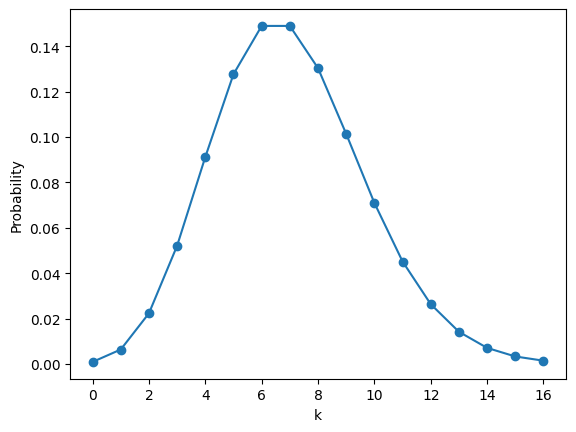

In [41]:
plt.plot(k, pmf, marker='o')
plt.xlabel('k')
plt.ylabel('Probability')

plt.show()

In [45]:
cdf = []

for ik in k:
    cdf.append(poisson_cdf(ik, _lambda=7))
    
cdf = np.round(cdf, 5)

In [47]:
for val, prob in zip(k, cdf):
    print(f"k-value {val} has probability = {prob}")

k-value 0 has probability = 0.00091
k-value 1 has probability = 0.0073
k-value 2 has probability = 0.02964
k-value 3 has probability = 0.08177
k-value 4 has probability = 0.17299
k-value 5 has probability = 0.30071
k-value 6 has probability = 0.44971
k-value 7 has probability = 0.59871
k-value 8 has probability = 0.72909
k-value 9 has probability = 0.8305
k-value 10 has probability = 0.90148
k-value 11 has probability = 0.94665
k-value 12 has probability = 0.973
k-value 13 has probability = 0.98719
k-value 14 has probability = 0.99428
k-value 15 has probability = 0.99759
k-value 16 has probability = 0.99904


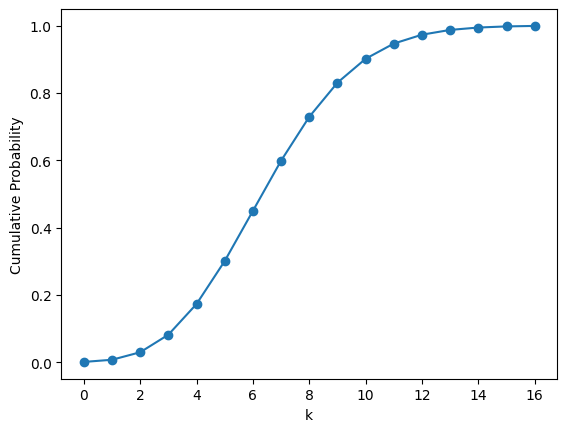

In [48]:
plt.plot(k, cdf, marker='o')
plt.xlabel('k')
plt.ylabel('Cumulative Probability')

plt.show()

Text(0, 0.5, 'probability')

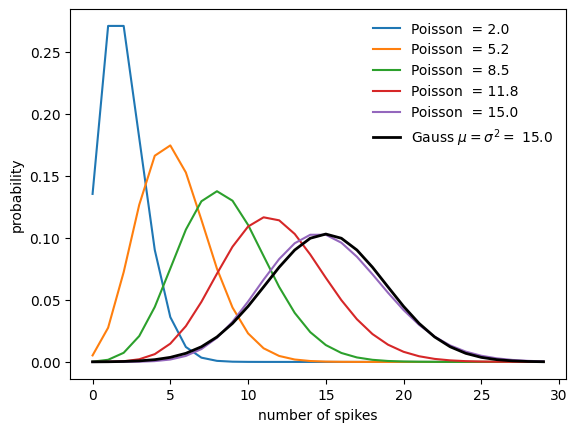

In [61]:
x = np.arange(30)

for lam in np.linspace(2, 15, 5):
    pmf = []
    for ix in x:
        pmf.append(poisson_pmf(ix, lam))
    
    plt.plot(x, pmf, label='Poisson  = %.1f' % lam)
    
def gaussian_pdf(x, mu, sigma_sq):
    return 1/(np.sqrt(2*np.pi*sigma_sq))*np.exp(-(x-mu)**2/sigma_sq/2)

plt.plot(gaussian_pdf(x, lam, lam), 'k', label=f"Gauss $\mu = \sigma^2 =$ {lam}", lw=2)
plt.legend(frameon=False)
plt.xlabel('number of spikes')
plt.ylabel('probability')

## Stochastic Process - Homework Assignment 02

### Exercise 01

Defects occur along the length of a filament according to a Poisson distribution of rate of $\lambda = 2$ per foot

(a) Calculate the probability that there are no defects in the first foot of the filament.

For $s >0$, $t >0$, the random variable has the Poisson distribution

$$
P[N(t+s) - N(s) = n] \sim \text{Poisson}(\lambda t)
$$

Due this Poisson process so that $N(0) = 0$.

We need to calculate the probability that there are no defects in the first foot of the filament:

$$
\begin{align}
    \begin{aligned}
        P[N(1)-N(0) = 0] &= P[N(1) - 0 = 0] \qquad\text{since}\quad N(0) = 0\\
        &= P[N(1) = 0] \\
        &= (2\cdot 1)^{0}\cdot\dfrac{e^{(-2 \cdot 1)}}{0!}\\
        &= 0.13534
    \end{aligned}
\end{align}
$$

(b) Calculate the conditional probability that there are no defects in the second foot of the filament, given that the first foot contained a single defect.

Due the property of Poisson process, $N(t)$ has independent increments. So for any time points $t < t_1 < t_2 < \dots < t_n$, the increment $N(t_1) - N(t_0),  N(t_2) - N(t_1), \dots, N(t_n) - N(t_{n-1})$ are independent random variables.

We need to calculate the conditional probability that there are no defects in the second foot of the filament, given that the first foot contained a single defect. That means

$$
\begin{align}
    \begin{aligned}
        P[N(2)-N(1) = 0 \mid N(1)-N(0) = 1] &= P[N(2)-N(1) = 0]\\
        &= (2\cdot 1)^{0}\cdot\dfrac{e^{(-2 \cdot 1)}}{0!}\\
        &= 0.13534
    \end{aligned}
\end{align}
$$

### Exercise 02

Customers arrive at a service facility according to a Poisson process of rate $\lambda$ customer/hour. Let $N(t)$ be the number of customers that have arrived up to
time $t$.

(a) What is $P[N (t) = k]$ for $k = 0, 1, \dots$ ?

$$
P[N(t) = k] = e^{(-\lambda t)}\dfrac{(\lambda t)^k}{k!}, \text{ for }k= 0, 1, \dots
$$

(b) Consider fixed times $0 < s < t$. Determine the conditional probability $P[N (t) = n + k|N (s) = n]$ and the expected value $\mathbb{E}[N (t)N (s)]$.

Determine the conditional probability $P[N (t) = n + k|N (s) = n]$. We have
$$
\begin{align}
    \begin{aligned}
        P[N (t) = n + k|N (s) = n] &= P[N (t - s) = k|N (s) = n]\\
        &= \dfrac{P[N (t - s) = k \cap N (s) = n]}{P[N (s) = n]} \\
        &= \dfrac{P[N (t - s) = k]P[ N (s) = n]}{P[N (s) = n]}\\
        &= P[N (t - s) = k] \\
        &= e^{[-\lambda (t - s)]}\dfrac{[\lambda (t - s)]^{k}}{k!}
    \end{aligned}
\end{align}
$$   

Determine the expected value $E[N (t)N (s)]$. We have
$$
\begin{align}
    \begin{aligned}
        \mathbb{E}[N (t)N (s)] &= \mathbb{E}[N(s)(N(t) - N(s) + N(s))] \\
        &= \mathbb{E}[N(s)(N(t) - N(s))] + E[N^2(s)]\\
        &= \mathbb{E}[N(s)]\mathbb{E}[N(t) - N(s)] + E[N^2(s)]\\
        &= \mathbb{E}[N(s)]\mathbb{E}[N(t) - N(s)] + Var[N(s)] + E[N(s)]^2\\
        &= \lambda^2st - \lambda^2s^2 + \lambda s + \lambda^2s^2\\
        &= \lambda^2st + \lambda s\\
        &= \lambda s (\lambda t + 1)
    \end{aligned}
\end{align}
$$


### Exercise 03

Messages arrive at a telegraph office as a Poisson process with mean rate of 3 messages per hour.

Let $N(t)$ be the total messages until $t$ (hour)

(a) What is the probability that no messages arrive during the morning hours 8:00 A.M. to noon?

$\lambda = 3$ (messages/ hour)

The morning hours 8:00 A.M. to noon = 4 hours

$$
P[N(12) - N(8)=0] = P[N(4) = 0] = e^{(-3 \cdot 4)}\dfrac{(3 \cdot 4)^0}{0!} = 6.1442 \times 10^{-6}
$$

(b) What is the distribution of the time at which the first afternoon message arrives?

Let $T$ be the time at which the first afternoon message arrives. The probability that no message arrives in the time interval of length $t-12$

$$
P(T > t] = P[N(t) - N(12) = 0] = e^{-\lambda (t-12)} = e^{-3 \cdot (t-12)}, t > 12
$$

So the distribution of the time at which the first afternoon message arrives can be written as:
$$
F_T(t) = e^{-3 \cdot (t-12)}, t > 12
$$
which means that the time is exponentially distributed with parameter $\lambda = 3$

Another: Let $\gamma_t$ be the waiting time interval from a time point to the first message comming at early afternoon.

$$
\gamma_t \sim \exp(3)
$$

### Exercise 04

Suppose that customers arrive at a facility according to a Poisson process having rate $\lambda = 2$. Let $N (t)$ be the number of customers that have arrived up to time $t$. Determine the following probabilities and conditional probabilities:

(a) $P [N (1) = 2]$

$$
P [N (1) = 2] = e^{-2 \cdot 1}\dfrac{(2 \cdot 1)^{n}}{2!} = 2e^{-2}
$$

(b) $P [N (3) = 6|N (1) = 2]$

$$
\begin{align}
    \begin{aligned}
        P[N (3) = 6|N (1) = 2] = \dfrac{P[N(1) = 2, N(3) = 6]}{P[N(1) = 2]} = \dfrac{2^6}{3}e^{-6}\dfrac{2!}{e^{-2}\cdot2^2}=\dfrac{2^5}{3}e^{-4}
    \end{aligned}
\end{align}
$$

(c) $P[N (1) = 2 \text{ and } N (3) = 6]$

$$
P [N (1) = 2 \text{ and } N (3) = 6] = P[N(1) = 2, N(3) - N(1) = 6 - 2] = P[N(1) = 2, N(2) = 4] = e^{(-2 \cdot 1)}\dfrac{(2 \cdot 1)^2}{2!}e^{(-2 \cdot 2)}\dfrac{(2 \cdot 2)^4}{4!} = \dfrac{2^6}{3}e^{-6}
$$

(d) $P [N (1) = 2 \mid N (3) = 6]$

$$
\begin{align}
    \begin{aligned}
        P[N(1) = 2 \mid N (3) = 6] = \dfrac{P[N(1) = 2, N(3) = 6]}{P[N(3) = 6]} = \dfrac{2^6}{3}e^{-6}\dfrac{6!}{e^{-6}6^6} = \dfrac{2^6}{3}\dfrac{6!}{6^6} = \dfrac{5 \cdot 2^7}{6^5}
    \end{aligned}
\end{align}
$$

### Exercise 05

Let ${N (t); t \geq 0}$ be a Poisson process having rate parameter $\lambda = 2$. Determine the numerical values to two decimal places for the following probabilities:

(a) $P [N (1) \leq 2]$

$$
P[N (1) \leq 2] = \sum_{k=0}^2e^{-2t}\dfrac{(2t)^k}{k!}
$$

(b) $P [N (1) = 1 \text{ and } N (2) = 3]$

$$
P[N (1) = 1 \text{ and } N (2) = 3] = P[N (1) = 1]P[N (2) = 3] = 4e^{-4}
$$

(c) $P [N (1) \geq 2 \mid N (1) \geq 1]$

$$
P [N (1) \geq 2 \mid N (1) \geq 1] = \dfrac{P[N (1) \geq 2, N (1) \geq 1]}{P[N (1) \geq 1]} = \dfrac{P[N (1) \geq 2]}{P[N (1) \geq 1]} = \dfrac{1 - P[N(1) <2 ]}{1-P[N(1) < 1]}
$$

### Exercise 06

Let ${N (t); t \geq 0}$ be a Poisson process having rate parameter $\lambda = 2$. Determine the following expectations:


(a) $\mathbb{E}[N (2)]$

$$
\mathbb{E}[N (2)] = \lambda t = 2\lambda
$$

(b) $\mathbb{E}[{N (1)}^2]$

$$
\mathbb{E}[{N (1)}^2] = Var[N(1)] + E[N(1)^2] = \lambda + \lambda^2 = ...
$$

(c) $\mathbb{E}[N (1)N (2)]$

\begin{align}
    \begin{aligned}
        \mathbb{E}[N (t)N (s)] &= \mathbb{E}[N(s)(N(t) - N(s) + N(s))] \\
        &= \mathbb{E}[N(s)(N(t) - N(s))] + E[N^2(s)]\\
        &= \mathbb{E}[N(s)]\mathbb{E}[N(t) - N(s)] + E[N^2(s)]\\
        &= \mathbb{E}[N(s)]\mathbb{E}[N(t) - N(s)] + Var[N(s)] + E[N(s)]^2\\
        &= \lambda^2st - \lambda^2s^2 + \lambda s + \lambda^2s^2\\
        &= \lambda^2st + \lambda s\\
        &= \lambda s (\lambda t + 1)
    \end{aligned}
\end{align}

$$
\mathbb{E}[N (1)N (2)] = \lambda^2 + \lambda
$$

### Exercise 07

Arrivals of customers at the local supermarket are modeled by a Poisson process with a rate of $\lambda= 10$ customers per minute. Let M be the number of customers arriving between $9 : 00$ and $9 : 10$. Also, let N be the number of customers arriving between $9 : 30$ and $9 : 35$.

a) What is the distribution of $M + N$ ?

Note: $W$ be the first odd time index with an arrival of $\mathbf{X}$, and $Y$ be the first even time index with an arrival of $\mathbf{X}$. We have $X \perp\!\!\!\!\perp Y$

$\tau_1 = 10$ (9:00 - 9:10)

$\tau_2 = 5$ (9:30 - 9:35)

We have $M \sim \text{Poisson}(\lambda \tau_1) = \text{Poisson}(10 \cdot 10)$, $N \sim \text{Poisson}(\lambda \tau_2) = \text{Poisson}(10 \cdot 5)$. And due to $M \perp\!\!\!\!\perp N$ and the sum of two independent Poisson random variables is a Poisson random variable. So that

$$
(M + N) \sim \text{Poisson}(\lambda \tau_1 + \lambda \tau_2) = \text{Poisson}(\lambda ( \tau_1 + \tau_2))
$$

b) Let $\widetilde{N}$ be the number of customers arriving between $9 : 10$ and $9 : 15$. What is the distribution of $M + \widetilde{N}$?

$\tau_3 = 5$ (9:10 - 9:15)

$\widetilde{N} \sim \text{Poisson}(\lambda \tau_3) = \text{Poisson}(50)$. Furthermore, $\widetilde{N}$ is also independent of $N$. Thus, the distribution of $M + N$ is the same as the $M + \widetilde{N}$

(c) Is it true if we say "the distribution of $M + N$ is the same as the distribution of $M + \widetilde{N}$".

$M + \widetilde{N}$ is the number of arrivals during an interval of length 15, and has therefore a Poisson distribution with parameter $10 \cdot 15 = 150$. In the previous case $M + N$ is the sum of two independent Poisson random variables and also has a Poisson distribution with parameter $10 \cdot 15 = 150$. So, it true if we say "the distribution of $M + N$ is the same as the distribution of $M + \widetilde{N}$".

**In general**, the probability of $k$ arrivals during a set of times of total length $\tau$ is always given by $P(k, \tau)$, even if that set is not an interval. (In this example, we dealt with the set $[9 : 00, 9 : 10] \cup [9 : 30, 9 : 35]$, of total length 15).

### Exercise 08

A radioactive source emits particles according to a Poisson process of rate $\lambda = 2$ particles per minute. What is the probability that the first particle appears after three minutes?

$$
P[N(3) - N(0) = 0] = (2 \cdot 3)^0\dfrac{e^{(-2 \cdot 3)}}{0!} = e^{-6}
$$

### Exercise 09

A radioactive source emits particles according to a Poisson process of rate $\lambda = 2$ particles per minute.

(a) What is the probability that the first particle appears some time after three minutes but before five minutes?

$$
\begin{align}
    \begin{aligned}
        P(\text{the first particle appears after 3 minutes but before 5 minutes}) &= P[N(3) = 0, N(5) \geq 1]\\
        &= P[N(3) = 0, N(5) - N(3) \geq 1]\\
        &= P[N(3) = 0]P[N(5) - N(3) \geq 1]\\
        &= P[N(3) = 0]P[N(2+3) - N(0+3) \geq 1]\\
        &= P[N(3) = 0]P[N(2) - N(0) \geq 1]\\
        &= P[N(3) = 0]P[N(2) \geq 1]\\
        &= P[N(3) = 0](1 - P[N(2) \leq 1])\\
        &= (2 \cdot 3)^0\dfrac{e^{(-2 \cdot 3)}}{0!} (1 - e^{-4})\\
        &= e^{-6} - e^{-10}
    \end{aligned}
\end{align}
$$

(b) What is the probability that exactly one particle is emitted in the interval from three to five minutes?

$$
\begin{align}
    \begin{aligned}
        P(\text{exactly one particle is emitted between 3 and 5 minutes}) &= P[N(5) - N(3) = 1]\\
        &= P[N(2+3) - N(0+3) = 1]\\
        &= P[N(2) - N(0) = 1]\\
        &= (2 \cdot 2)^0\dfrac{e^{(-2 \cdot 2)}}{0!}\\
        &= 4e^{-4}
    \end{aligned}
\end{align}
$$

### Exercise 10

Customers enter a store according to a Poisson process of rate $\lambda = 6$ per hour. Suppose it is known that but a single customer entered during the first hour. What is the conditional probability that this person entered during the first fifteen minutes?

We hav $\lambda = 6$ per hour = $1/10$ per minute.

$$
\begin{align}
    \begin{aligned}
        P[\text{person entered during the first fifteen minutes} \mid \text{a single customer entered during the first hour}] &= P[N(15) = 0 \mid N(60) \geq 1]\\
        &= \dfrac{P[N(60) \geq 1, N(15) = 0]}{P[N(60) \geq 1]}\\
        &= \dfrac{(1 - P[N(60) \leq 1])P[N(15) = 0]}{1 - P[N(60) \leq 1]}
    \end{aligned}
\end{align}
$$

### Exercise 11

Let $N(t)$ be a Poisson process of rate $\lambda = 3$ per hour. Find the conditional probability that there were two events in the first hour, given that there were five events in the first three hours.

$$
\begin{align}
    \begin{aligned}
        P[N(1) = 2 \mid N(3) = 5] &= \dfrac{P[N(3) = 5, N(1) = 2]}{P[N(3) = 5]} \\
        &= \dfrac{P[N(3) - N(1) = 5 - 2, N(1) = 2]}{P[N(3) = 5]}\\
        &= \dfrac{P[N(2) = 3, N(1) = 2]}{P[N(3) = 5]}\\
        &= \dfrac{P[N(1) = 2]P[N(2) = 3]}{P[N(3) = 5]}\\
    \end{aligned}
\end{align}
$$

### Exercise 12

Bacteria are distributed throughout a volume of liquid according to a Poisson process of intensity $\lambda = 0.6$ organisms per $mm^3$ . A measuring device counts the number of bacteria in a $10 mm^3$ volume of the liquid. What is the probability that more than two bacteria are in this measured volume?

Let $X$ denotes the number of bacteria in a a $10 mm^3$ volume of the liquid. Hence, $X$ is a Poisson distribution with lambda parameter $\lambda = 0.6 \times 10 = 6$. So, the probability that more than two bacteria are in this measured volume can be calculated as:

$$
\begin{align}
    \begin{aligned}
        P(\text{more than two bacteria are in this measured volume}) &= P[X > 2]\\
        &= 1 - P[X \leq 2]\\
        &= 1 - \left(P[X=0) + P[X=1) + P[X=2)\right)\\
        &= 1 - \left(e^{-6}\dfrac{6^0}{0!} + e^{-6}\dfrac{6^1}{1!} + e^{-6}\dfrac{6^2}{2!}\right)\\
        &= 1 - e^{-6}\left(1+6+\dfrac{6^2}{2}\right)\\
        &\approx 0.938
    \end{aligned}
\end{align}
$$

### Exercise 13

Customer arrivals at a certain service facility follow a Poisson process of unknown rate. Suppose it is known that 12 customers have arrived during the first three hours. Let $N_i$ be the number of customers who arrive during the $i$-th hour, $i = 1, 2, 3$. Determine the probability that $N_1 = 3$, $N_2 = 4$, and $N_3 = 5$.

Suppose that the Poisson process has rate $\lambda$. Then the conditional probability can be writen as:

$$
\begin{align}
    \begin{aligned}
        P[N_1 = 3, N_2 = 4, N_3 = 5 \mid N = 12] &= \dfrac{P[N_1 = 3, N_2 = 4, N_3 = 5]}{P[N=12]}\\
        &= e^{-\lambda}\dfrac{\lambda^3}{3!}e^{-\lambda}\dfrac{\lambda^4}{4!}e^{-\lambda}\dfrac{\lambda^5}{5!}\dfrac{12!}{e^{-3\lambda}(3\lambda)^12}\\
        &= \dfrac{12!}{3!4!5!3^{12}}\\
        &\approx 0.0522
    \end{aligned}
\end{align}
$$

### Exercise 14

Patients arrive at the doctor's office according to a Poisson process with rate $\lambda = 1/10$ minute. The doctor will not see a patient until at least three patients are in the waiting room.

Let $N(t)$ be the Poisson process with mean $\lambda$. We know that 

$$
P[N(t) = k] = \dfrac{(\lambda t)^k}{k!}e^{-(\lambda t)}
$$

(a) Find the expected waiting time until the first patient is admitted to see the doctor.

Let $Z_n$ be the time between arrival of the $n$-th patient and the  $n-1$-th patient. $Z_n$ are iid exponential random variables with mean $\dfrac{1}{\lambda}$, donated by $\mathbb{E}[Z_n] = \dfrac{1}{\lambda}$.

Let $T_n$ be the arrival time of $n$-th patient, which means

$$
T_n = \sum_{j=1}^nZ_n
$$

The expectation of $T_n$:

$$
\mathbb{E}[T_n] = \mathbb{E}\left[\sum_{j=1}^nZ_n\right] = \sum_{j=1}^n\mathbb{E}[Z_n]=\sum_{j=1}^n\dfrac{1}{\lambda}=\dfrac{n}{\lambda}
$$

The expected waiting time until the first patient is admitted to see the doctor:

$$
\mathbb{E}[T_3] = \dfrac{3}{1/10} = 30
$$

(b) What is the probability that nobody is admitted to see the doctor in the first hour?

$$
\begin{align}
    \begin{aligned}
        P[\text{ nobody is admitted to see the doctor in the first hour}] &= P[\text{At most 2 patient arrive in first hour}]\\
        &= P[X(t) \geq 2] \\
        &= P[X(60) \geq 2] \\
        &= P[X(60) = 0] + P[X(60) = 1] + P[X(60) = 2]
      \end{aligned}
\end{align}  
$$

### Exercise 15

Let $S_n$ , denote the time of the $n$-th event of a Poisson process $N(t)$ with rate $λ$. Suppose that one event has occurred in the interval $(0, t)$. Show that the conditional distribution of arrival time $S_1$ , is uniform over $(0, t)$.

*Proof*

According the hypothesis, one event has occurred in the interval $(0, t)$. Let $S_1$ denotes the first event in the interval $[\tau_1, \tau_2]$, where $\tau_1 = 0$, and $\tau_2 = t$, then for $s \in [\tau_1, \tau_2] = (0, t)$, we find the conditional probability

$$
\begin{align}
    \begin{aligned}
        P[S_1 \leq s \mid N(t) = 1] &= \dfrac{P[S_1 \leq s, N(t) = 1]}{{P[N(t) = 1]}} \\
        &= \dfrac{P[N(s) = 1]P[N(t) - N(s) = 0]}{{P[N(t) = 1]}}\\
        &= e^{-\lambda s}\dfrac{\lambda s}{1!}e^{-\lambda (t-s)}\dfrac{\lambda (t-s)}{0!}\dfrac{1!}{e^{-\lambda s}\lambda s}\\
        &= \dfrac{s}{t}, s < t
    \end{aligned}
\end{align}  
$$

which is the CDF of the Uniform $(0,t)$ distribution. $\square$

Case 2:$s < 0$

Case 3:$t \leq s$